<a href="https://colab.research.google.com/github/sakshighugare/OIBSIP/blob/main/final_Iris_flower_classification_project_111pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Project : IRIS FLOWER CLASSIFICATION

Problem Statement


Iris flower has 3 species: Setosa, Versicolor and Virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

INPUT:
Sepal Length

Sepal width

Petal length

Petal width

OUTPUT:

Class of Flower

# Objective
The objective of the iris flower classification project is to build a machine learning model capable of accurately identifying the species of iris flowers based on their four measurements (sepal length, sepal width, petal length, and petal width). By training and optimizing this model using the iris dataset, we aim to create a practical tool for species identification, plant breeding, and ecological studies. The project involves data collection, preprocessing, algorithm selection, model training, evaluation, and potential deployment for real-world applications. Ultimately, the goal is to achieve a high level of accuracy in classifying iris flowers into their respective species.

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Train_Test_Split for splitting the Dataset
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings(action='ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# D**ataset Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

DF= pd.read_csv('/content/drive/MyDrive/oasis internship /Iris.csv')


**Dataset First View**

In [ ]:
#dataset first look
DF.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
DF.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Rename the complex columns name
DF= DF.rename(columns={'SepalLengthCm':'Sepal_Length',
                           'SepalWidthCm':'Sepal_Width',
                           'PetalLengthCm':'Petal_Length',
                           'PetalWidthCm':'Petal_Width'})

**Dataset Rows & Columns count**

In [ ]:
# Dataset Rows & Columns count
DF.shape

(150, 6)

In [ ]:
# delete a column
DF = DF.drop(columns = ['Id'])
DF.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
DF.tail()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
DF.shape

(150, 5)

**Dataset Information**

In [ ]:
# Dataset Info
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# to display stats about data
DF.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Missing Values/Null Values**

In [ ]:
# check for null values
DF.isnull().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

There are no null/missing values present in the dataset.

# **Exploratory Data Analysis**

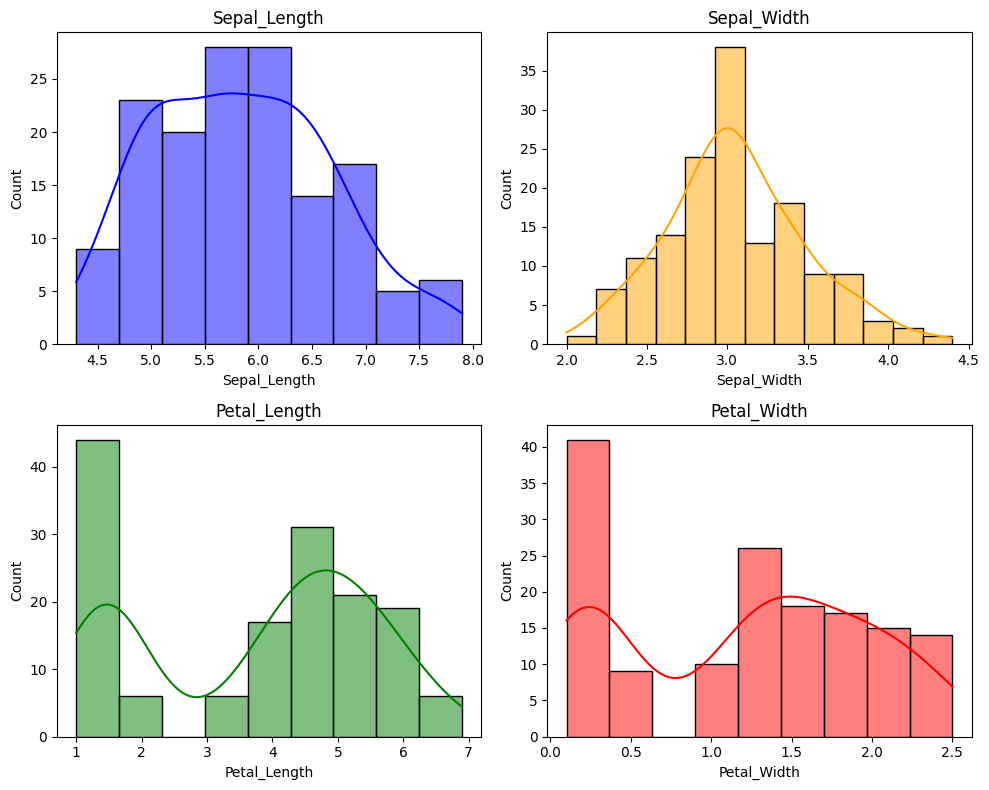

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
colors = ['blue', 'orange', 'green', 'red']

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, (feature, color) in enumerate(zip(features, colors)):
    row = i // 2  # Calculate the row index
    col = i % 2   # Calculate the column index

    sns.histplot(data=DF, x=feature, kde=True, ax=axs[row, col], color=color)
    axs[row, col].set_title(feature)

plt.tight_layout()
plt.show()


# **Scatterplot**

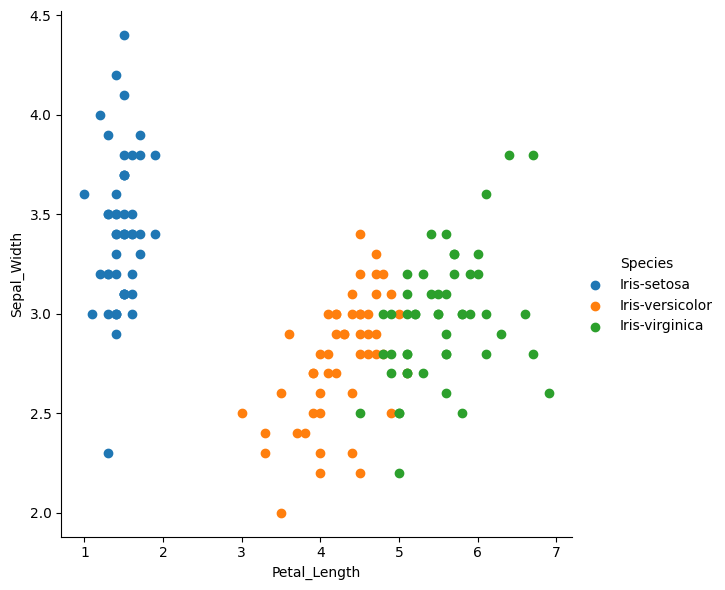

In [ ]:
sns.FacetGrid(DF, hue="Species",height=6).map(plt.scatter,"Petal_Length","Sepal_Width").add_legend()

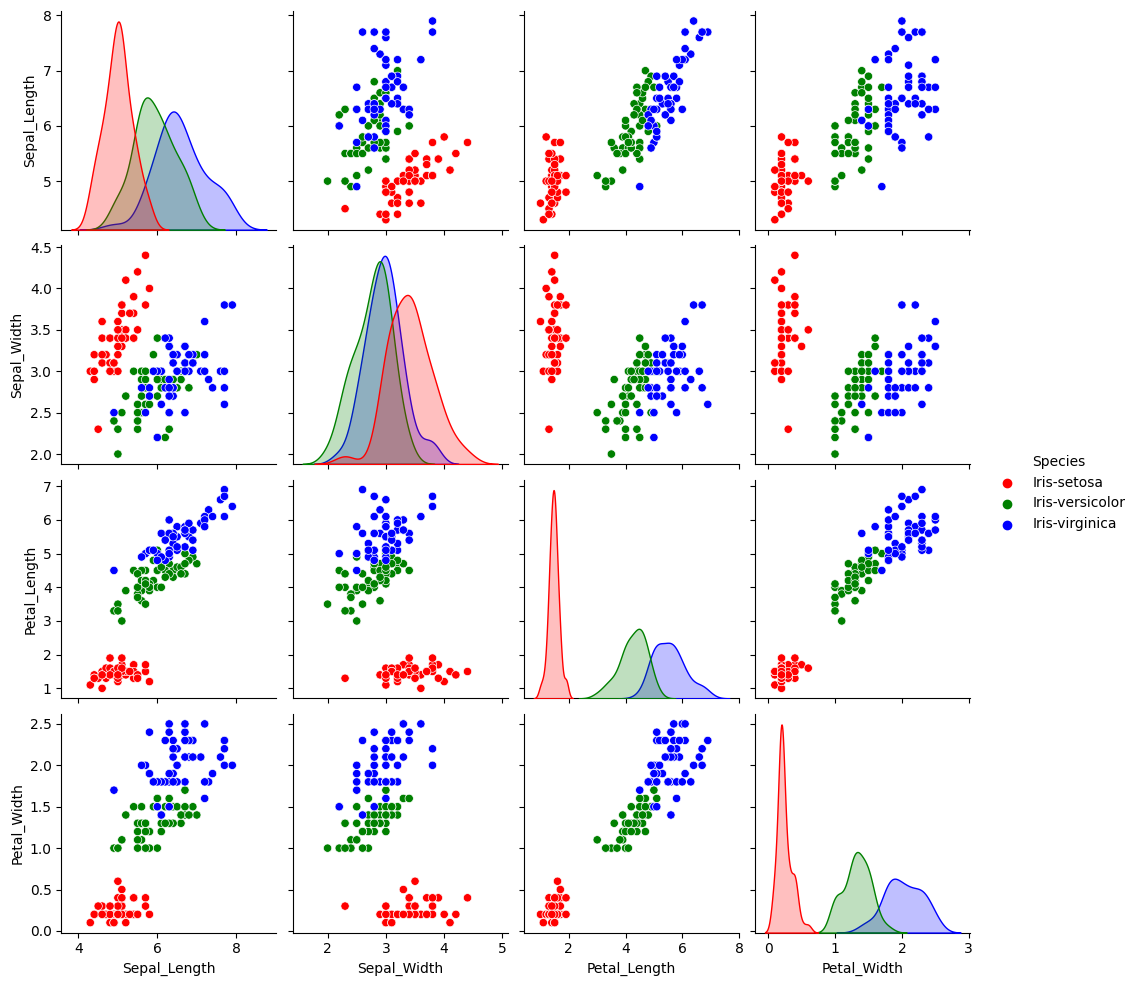

In [ ]:
# visualize the whole dataset
custom_palette = ["red", "green", "blue"]

sns.pairplot(
    DF[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']],
    hue="Species",
    diag_kind='kde',
    palette=custom_palette
)


** Feature Engineering & Data Pre-processing**

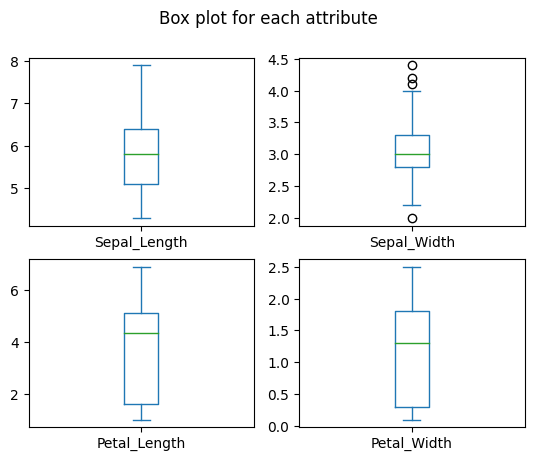

In [ ]:
#Checking outliers
DF.plot(kind = 'box', subplots = True, layout = (2, 2),
               sharex = False, sharey = False, title = "Box plot for each attribute")
plt.show()

In [ ]:
train, test = train_test_split(DF, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [ ]:
train_X = train[['Sepal_Length', 'Sepal_Width', 'Petal_Length',
                 'Petal_Width']]
train_y = train.Species

test_X = test[['Sepal_Length', 'Sepal_Width', 'Petal_Length',
                 'Petal_Width']]
test_y = test.Species


In [ ]:
train_X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
107,7.3,2.9,6.3,1.8
73,6.1,2.8,4.7,1.2
35,5.0,3.2,1.2,0.2
75,6.6,3.0,4.4,1.4
98,5.1,2.5,3.0,1.1


In [ ]:
test_y.head()

140     Iris-virginica
81     Iris-versicolor
12         Iris-setosa
92     Iris-versicolor
126     Iris-virginica
Name: Species, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(train_X, train_y)

# Make predictions on the test set
prediction = model.predict(test_X)

# Calculate the accuracy score
accuracy = accuracy_score(test_y, prediction)

# Print the accuracy score
print('Accuracy score:', accuracy)


Accuracy score: 0.9736842105263158


# **Support Vector**

In [ ]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy score =",accuracy_score(test_y,pred_y))

Accuracy score = 0.9473684210526315


# **Decision tree**

In [ ]:
#Using Decision tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.9210526315789473


# **Conclusion**
In conclusion, the iris classification project is a simple yet powerful machine learning project that involves the classification of iris flowers into three different species based on their sepal and petal dimensions.

We began the project by importing the necessary libraries, loading the dataset, and performing exploratory data analysis (EDA) to understand the characteristics of the dataset. After that, we preprocessed the dataset by separating the input features and the target variable, splitting the data into training and testing sets, and scaling the input features.

We then trained various machine learning models, including logistic regression, support vector, decision tree.

Based on the evaluation results, we found the accuracy of 97% . We also observed that the petal length and petal width features were the most important in predicting the iris species.

Finally, we deployed the trained model on new data to make predictions, demonstrating the practical use of the machine learning model.

